### Лабораторная работа №1 ###


(Квази) линейные методы классификации

1. Загрузить таблицу Iris из репозитория UCI (можно из любого доступного источника: UCI, sklearn, kaggle). Поместить данные в объект DataFrame библиотеки pandas. 
Вычислить корреляции между признаками на всей таблице и отдельно по классам (использовать pd.groupby). 
Визуализировать распределения классов на всех парах переменных. 

2. Выбрать две переменные. Построить и визуализировать (показать разделяющую кривую) решения методами линейный и квадратичный дискриминант, логистическая регрессия, SVM (линейное и квадратичное ядро). Пример подходящей визуализации есть в sklearn.

В следующих заданиях можно оставить только два (наименее разделимых) класса.

3. Построить линейный дискриминант на всех переменных. Визуализировать ответы алгоритма (выделить, например, цветом) на обучающей выборке и классы объектов (выделить, например, формой маркеров) во всех двумерных подпространствах.

4. На двух переменных из п2 вычислить квадратичную разделяющую функцию непосредственно по оценкам ковариационных матриц и средних (самостоятельно реализовать метод, не используя готовый). Визуализировать её и сравнить с решением из п2. 

### Решение ###

In [ ]:
%pip install pandas numpy scikit-learn matplotlib seaborn

#### Установка зависимостей ####

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn import datasets

In [4]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [5]:
from numpy import pi
from numpy import linalg as la

In [6]:
from itertools import combinations

In [7]:
iris = datasets.load_iris()

#### Задание 1 ####

In [8]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [9]:
iris_frame = pd.DataFrame(data=iris.data, columns=iris.feature_names)

In [10]:
iris_frame['target'] = iris.target
iris_frame['name'] = iris_frame['target'].map(lambda target: iris.target_names[target])

In [11]:
iris_frame.iloc[:,:4].corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


In [12]:
iris_frame.iloc[:,[0,1,2,3,5]].groupby('name').corr()

sepal length (cm)  sepal width (cm)  \
name                                                                
setosa     sepal length (cm)           1.000000          0.742547   
           sepal width (cm)            0.742547          1.000000   
           petal length (cm)           0.267176          0.177700   
           petal width (cm)            0.278098          0.232752   
versicolor sepal length (cm)           1.000000          0.525911   
           sepal width (cm)            0.525911          1.000000   
           petal length (cm)           0.754049          0.560522   
           petal width (cm)            0.546461          0.663999   
virginica  sepal length (cm)           1.000000          0.457228   
           sepal width (cm)            0.457228          1.000000   
           petal length (cm)           0.864225          0.401045   
           petal width (cm)            0.281108          0.537728   

                              petal length (cm)  petal width (cm)  
name                                                               
setosa     sepal length (cm)           0.267176          0.278098  
           sepal width (cm)            0.177700          0.232752  
           petal length (cm)           1.000000          0.331630  
           petal width (cm)            0.331630          1.000000  
versicolor sepal length (cm)           0.754049          0.546461  
           sepal width (cm)            0.560522          0.663999  
           petal length (cm)           1.000000          0.786668  
           petal width (cm)            0.786668          1.000000  
virginica  sepal length (cm)           0.864225          0.281108  
           sepal width (cm)            0.401045          0.537728  
           petal length (cm)           1.000000          0.322108  
           petal width (cm)            0.322108          1.000000

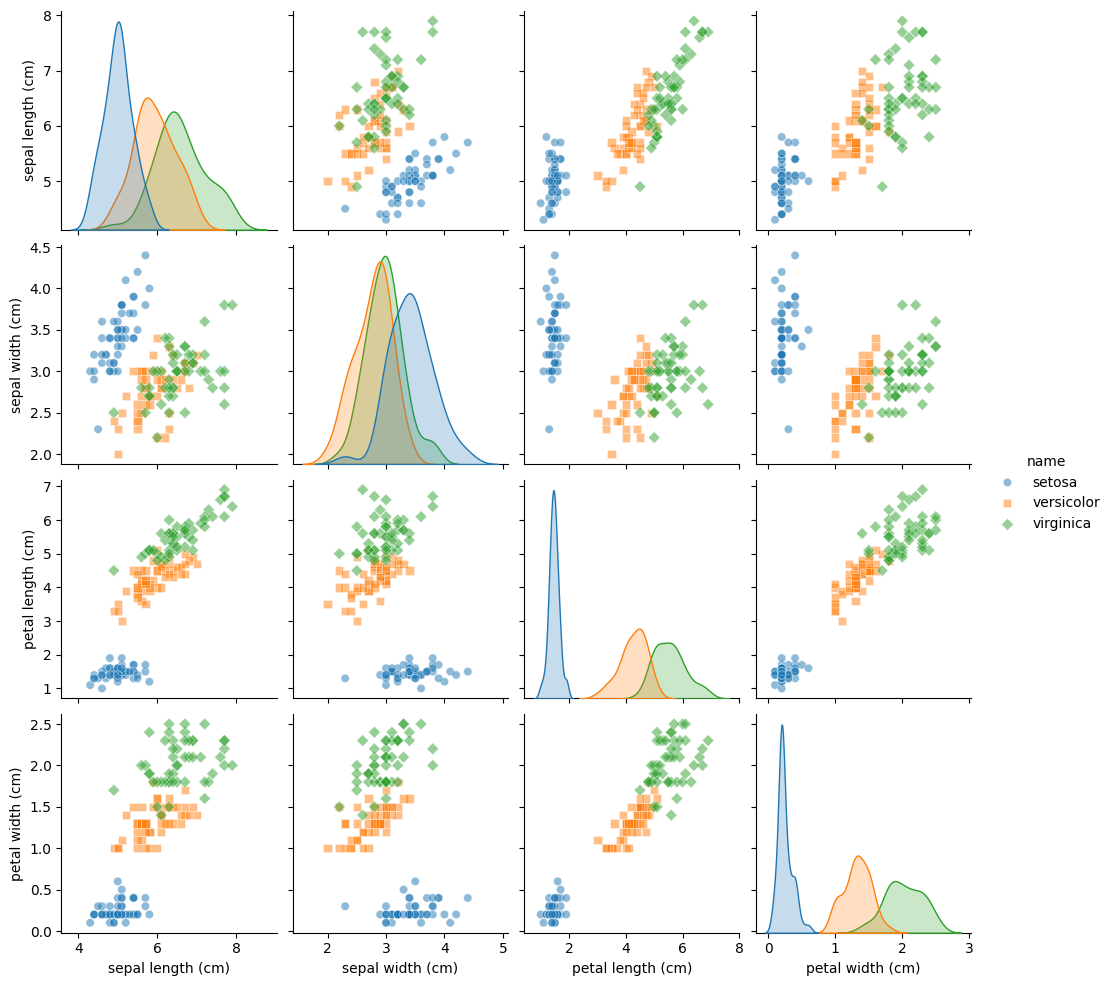

In [13]:
sns.pairplot(iris_frame.iloc[:,[0,1,2,3,5]], hue="name", markers=["o", "s", "D"], plot_kws={'alpha':0.5})
plt.show()

#### Задание 2 ####

In [14]:
def make_meshgrid(x, y, h=.02):
    d = 2
    x_min, x_max = x.min() - d, x.max() + d
    y_min, y_max = y.min() - d, y.max() + d
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,0]
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

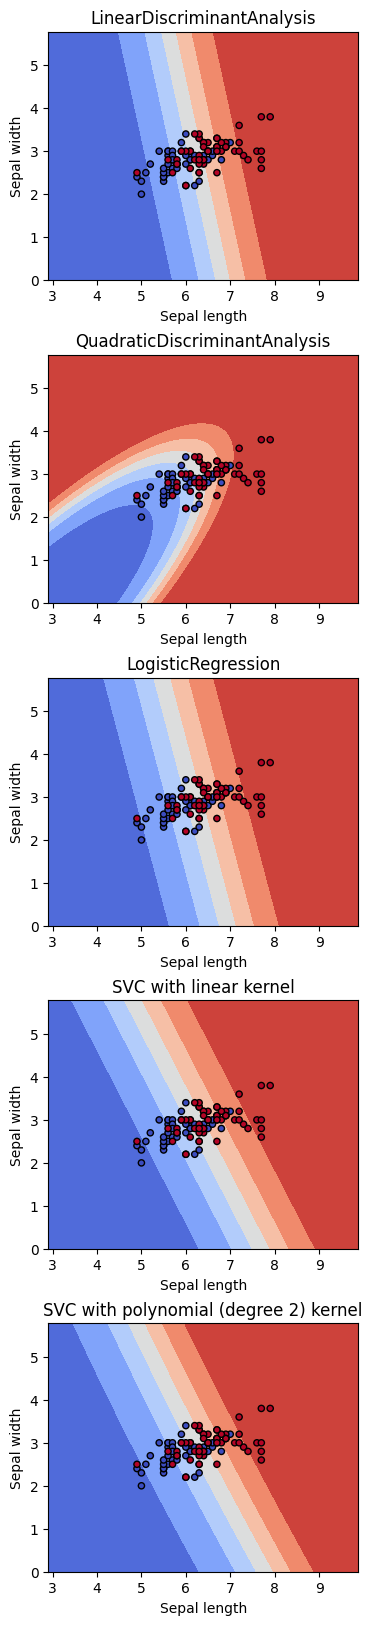

In [15]:
X = iris.data[iris.target!=0, :2] # исключаем класс setosa
y = iris.target[iris.target!=0]   # исключаем класс setosa

models = [
    LinearDiscriminantAnalysis(solver='svd', store_covariance=True),
    QuadraticDiscriminantAnalysis(store_covariance=True),
    LogisticRegression(),
    SVC(kernel='linear', C=1.0, probability=True),
    SVC(kernel='poly', degree=2, C=1.0, probability=True)
]

for classifier in models:
  classifier.fit(X, y)

titles = [
   'LinearDiscriminantAnalysis',
   'QuadraticDiscriminantAnalysis',
   'LogisticRegression',
   'SVC with linear kernel',
   'SVC with polynomial (degree 2) kernel'
    ]

fig, sub = plt.subplots(5, 1,figsize=(4,20))
plt.subplots_adjust(wspace=0.1, hspace=0.3)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for classifier, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, classifier, xx, yy,
                  cmap=plt.cm.coolwarm_r)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_title(title)

plt.show()

#### Задание 3 ####

In [16]:
# Загружаем данные
X = iris.data[iris.target!=0, :]  # исключаем класс setosa
y = iris.target[iris.target!=0]   # исключаем класс setosa

In [17]:
# Обучаем LDA
lda = LinearDiscriminantAnalysis()
lda = lda.fit(X, y)  # Преобразуем данные

# Генерируем предсказания (цвет)
y_pred = lda.predict(X)

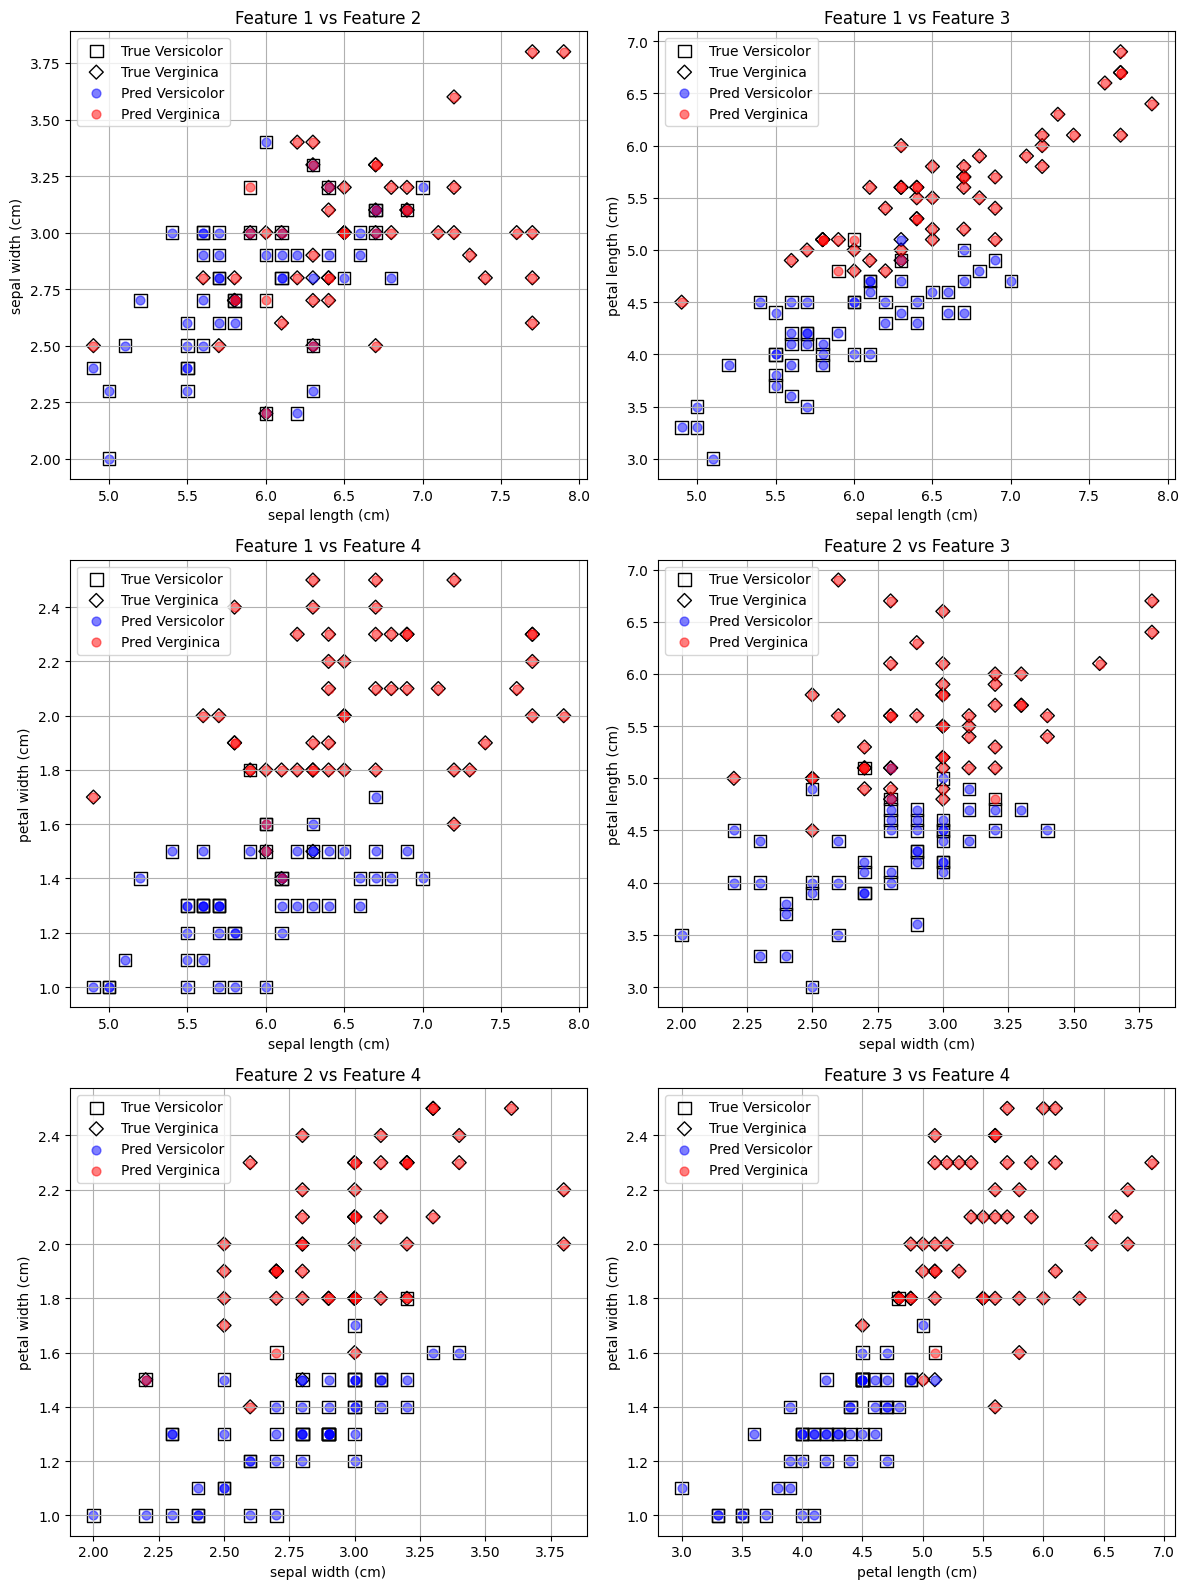

In [18]:
# Создаем список всех пар признаков
feature_pairs = list(combinations(range(X.shape[1]), 2))

# Создаем графики
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 16))
axes = axes.flatten()

for i, (f1, f2) in enumerate(feature_pairs):
    ax = axes[i]
    
    # Реальные данные
    for cls, marker, s, class_name in zip(np.unique(y), ['s', 'D'], [80, 50], ['Versicolor', 'Verginica']):
        ax.scatter(X[y == cls, f1], X[y == cls, f2], marker=marker, s=s, edgecolors='k', facecolors='none', label=f'True {class_name}')
    
    # Предсказания
    ax.scatter(X[y_pred==1, f1], X[y_pred==1, f2], c='blue', marker='o', s=40, alpha=0.5, label=f'Pred Versicolor')
    ax.scatter(X[y_pred==2, f1], X[y_pred==2, f2], c='red', marker='o', s=40, alpha=0.5, label=f'Pred Verginica')

    # Настройки графика
    ax.set_xlabel(iris.feature_names[f1])
    ax.set_ylabel(iris.feature_names[f2])
    ax.legend()
    ax.set_title(f'Feature {f1+1} vs Feature {f2+1}')
    ax.grid()

plt.tight_layout()
plt.show()

#### Задание 4 ####

In [19]:
iris = datasets.load_iris()
X = iris.data[iris.target != 0, :2]
y = iris.target[iris.target != 0]

X1 = X[y == 1]  # Versicolor
X2 = X[y == 2]  # Verginica

In [20]:
mu1, mu2 = np.mean(X1, axis=0), np.mean(X2, axis=0)

# rowvar=True -> Строка-переменная, колонка-наблюдение
# rowvar=False-> Строка-наблюдение, колонка-переменная
lambda1, lambda2 = np.cov(X1, rowvar=False), np.cov(X2, rowvar=False) 

p1, p2 = len(X1) / len(X), len(X2) / len(X)

lambda1_inv, lambda2_inv = np.linalg.inv(lambda1), np.linalg.inv(lambda2) # Обратные матрицы ковариаций
lambda1_det, lambda2_det = np.linalg.det(lambda1), np.linalg.det(lambda2) # Определители матриц ковариаций

In [21]:
ident = 0.5
x_min, x_max = X[:, 0].min() - ident, X[:, 0].max() + ident # Первый признак
y_min, y_max = X[:, 1].min() - ident, X[:, 1].max() + ident # Второй признак
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), 
                     np.linspace(y_min, y_max, 200))

# В xx - строка всех значений повт
# В yy - строка первого значения, второго, ...
x_y_pairs = np.c_[xx.ravel(), yy.ravel()]

In [22]:
# A = lambda2_inv - lambda1_inv
# B = 2 * (mu1 @ lambda2_inv - mu2 @ lambda1_inv)
# C = mu2.T @ lambda2_inv @ mu2 - mu1.T @ lambda1_inv @ mu1 + np.log(lambda2_det / lambda1_det) + 2 * np.log(p1 / p2)

# decision_boundary = np.sum(grid @ A * grid, axis=1) + grid @ B + C

In [23]:
def quadratic_discriminant(x, mu, lambda_inv):
    diff = x - mu
    return np.sum(diff @ lambda_inv * diff, axis=1)

Q1 = quadratic_discriminant(x_y_pairs, mu1, lambda1_inv)
Q2 = quadratic_discriminant(x_y_pairs, mu2, lambda2_inv)
decision_boundary = Q2 - Q1 + np.log(lambda2_det / lambda1_det) + 2 * np.log(p1 / p2)

In [24]:
Z = decision_boundary.reshape(xx.shape)

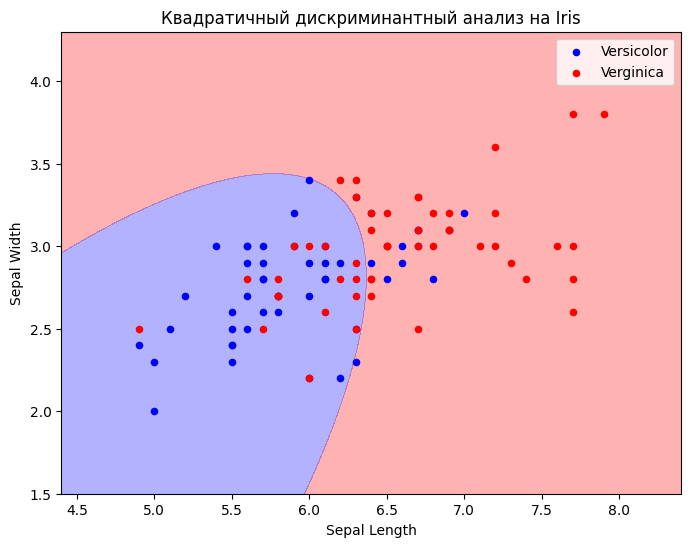

In [25]:
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, levels=0, colors=['red', 'blue'])

plt.scatter(X1[:, 0], X1[:, 1], color='blue', marker='o', s=20, alpha=1.0, label=f'Versicolor')
plt.scatter(X2[:, 0], X2[:, 1], color='red', marker='o', s=20, alpha=1.0, label=f'Verginica')
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Квадратичный дискриминантный анализ на Iris")
plt.legend()
plt.show()